In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

In [2]:
res_list = []

for i in range(60):
    res_list.append(qload('itj_{}'.format(i+1)))
    
res_list[0].states[-1]

Loaded Result object:
Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0
Loaded Result object:
Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0
Loaded Result object:
Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0
Loaded Result object:
Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0
Loaded Result object:
Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0
Loaded Result object:
Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0
Loaded Result object:
Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0
Loaded Result object:
Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0
Loaded Result object:
Result object with sesolve

Quantum object: dims = [[2, 2, 2, 2], [1, 1, 1, 1]], shape = (16, 1), type = ket
Qobj data =
[[-0.06828861-0.06189704j]
 [-0.35789003-0.32169106j]
 [-0.34890371-0.35706926j]
 [-0.30345332-0.33335913j]
 [-0.20356441-0.17773086j]
 [-0.07277277-0.06584667j]
 [-0.07004602-0.07323895j]
 [-0.05936387-0.06745147j]
 [-0.20540267-0.1816948j ]
 [-0.07337522-0.06611684j]
 [-0.07210203-0.07407838j]
 [-0.06224263-0.06786571j]
 [-0.20541532-0.17780953j]
 [-0.07318682-0.06486464j]
 [-0.07259084-0.07364061j]
 [-0.06150213-0.06717786j]]

In [3]:
res00_list = []
res01_list = []
res10_list = []
res11_list = []

for i in range(60):
    if i % 2 == 1:
        res00_list.append(expect(ptrace(res_list[i].states[-1], [2,3]), tensor(basis(2,0),basis(2,0))))
        res01_list.append(expect(ptrace(res_list[i].states[-1], [2,3]), tensor(basis(2,0),basis(2,1))))
        res10_list.append(expect(ptrace(res_list[i].states[-1], [2,3]), tensor(basis(2,1),basis(2,0))))
        res11_list.append(expect(ptrace(res_list[i].states[-1], [2,3]), tensor(basis(2,1),basis(2,1))))

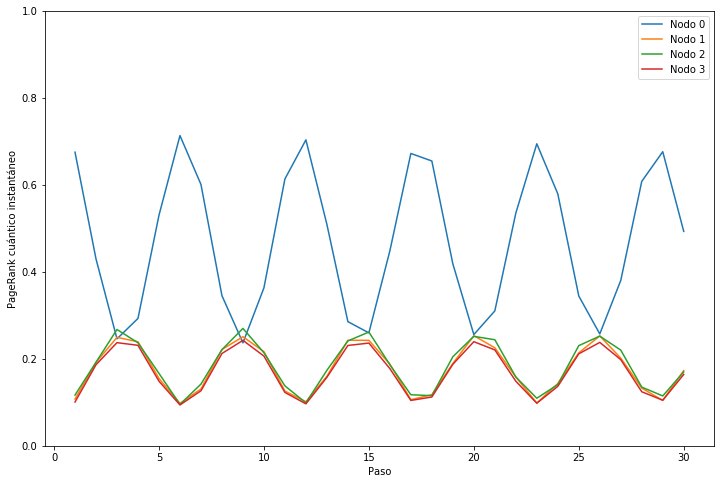

In [4]:
'''
res00_list = [0.675, 0.445026, 0.263501, 0.303953, 0.532107, 0.709841, 0.610969, \
0.36502, 0.250005, 0.367761, 0.613771, 0.709156, 0.528862, 0.301987, \
0.264544, 0.448229, 0.676887, 0.673072, 0.441833, 0.262497, 0.305952, \
0.535344, 0.710475, 0.608142, 0.362304, 0.250044, 0.370525, 0.616546, \
0.708421, 0.52561]

res01_list = [0.108333, 0.184991, 0.2455, 0.232016, 0.155964, 0.0967197, 0.129677, \
0.21166, 0.249998, 0.210746, 0.128743, 0.096948, 0.157046, 0.232671, \
0.245152, 0.183924, 0.107704, 0.108976, 0.186056, 0.245834, 0.231349, \
0.154885, 0.0965082, 0.130619, 0.212565, 0.249985, 0.209825, \
0.127818, 0.0971931, 0.15813]

res10_list = [0.108333, 0.184991, 0.2455, 0.232016, 0.155964, 0.0967197, 0.129677, \
0.21166, 0.249998, 0.210746, 0.128743, 0.096948, 0.157046, 0.232671, \
0.245152, 0.183924, 0.107704, 0.108976, 0.186056, 0.245834, 0.231349, \
0.154885, 0.0965082, 0.130619, 0.212565, 0.249985, 0.209825, \
0.127818, 0.0971931, 0.15813]

res11_list = [0.108333, 0.184991, 0.2455, 0.232016, 0.155964, 0.0967197, 0.129677, \
0.21166, 0.249998, 0.210746, 0.128743, 0.096948, 0.157046, 0.232671, \
0.245152, 0.183924, 0.107704, 0.108976, 0.186056, 0.245834, 0.231349, \
0.154885, 0.0965082, 0.130619, 0.212565, 0.249985, 0.209825, \
0.127818, 0.0971931, 0.15813]
'''

fig, axes = plt.subplots(1, 1, sharex=True, figsize=(12,8))
axes.plot(list(range(1,31)),np.abs(res00_list), label='Nodo 0')
axes.plot(list(range(1,31)),np.abs(res01_list), label='Nodo 1')
axes.plot(list(range(1,31)),np.abs(res10_list), label='Nodo 2')
axes.plot(list(range(1,31)),np.abs(res11_list), label='Nodo 3')
axes.set_xlabel('Paso')
axes.set_ylabel('PageRank cuántico instantáneo')
axes.set_ylim(0,1)
axes.legend()
fig.savefig('../../../img/star-inst-lossless.eps', format='eps')

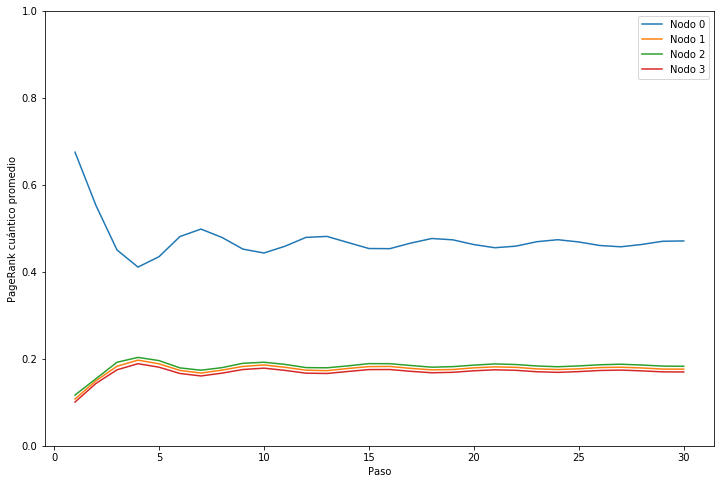

In [5]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(12,8))
axes.plot(list(range(1,31)),np.abs([np.mean(res00_list[:i+1]) for i in range(len(res00_list))]), label='Nodo 0')
axes.plot(list(range(1,31)),np.abs([np.mean(res01_list[:i+1]) for i in range(len(res01_list))]), label='Nodo 1')
axes.plot(list(range(1,31)),np.abs([np.mean(res10_list[:i+1]) for i in range(len(res10_list))]), label='Nodo 2')
axes.plot(list(range(1,31)),np.abs([np.mean(res11_list[:i+1]) for i in range(len(res11_list))]), label='Nodo 3')
axes.set_xlabel('Paso')
axes.set_ylabel('PageRank cuántico promedio')
axes.set_ylim(0,1)
axes.legend()
fig.savefig('../../../img/star-mean-lossless.eps', format='eps')

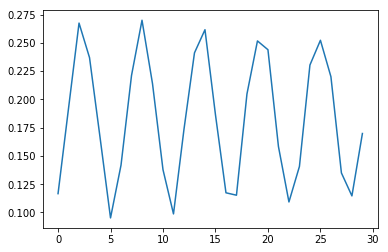

In [6]:
plt.plot(np.abs(res10_list))

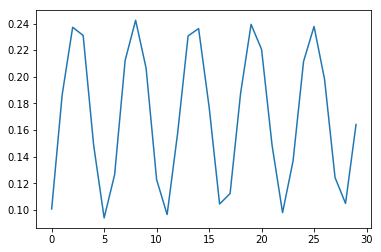

In [7]:
plt.plot(np.abs(res11_list))

In [8]:
[np.mean(res00_list),np.mean(res01_list),np.mean(res10_list),np.mean(res11_list)]

[0.4710929204044219,
 0.17629214250811837,
 0.18281636066874105,
 0.16979857641871865]

In [9]:
np.mean(res00_list)+np.mean(res01_list)+np.mean(res10_list)+np.mean(res11_list)

1.0